In [1]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
X = [[6], [8], [10], [14], [18]]
y = [[7], [9], [13], [17.5], [18]]

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

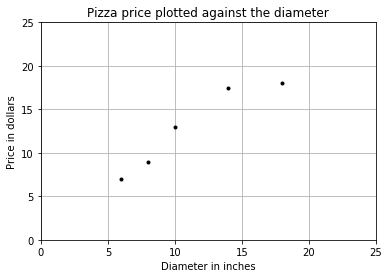

In [10]:
plt.figure()
plt.title("Pizza price plotted against the diameter")
plt.xlabel("Diameter in inches")
plt.ylabel("Price in dollars")
plt.plot(X,y,'k.')
plt.axis([0,25,0,25])
plt.grid(True)
plt.show()

In [11]:
# 1. Simple Linear Regression with one variable 

In [13]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [14]:
#Train the model
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

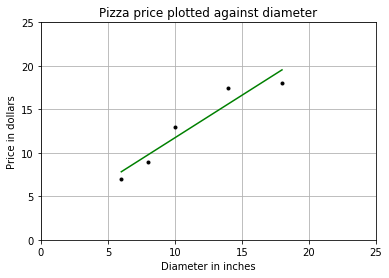

In [18]:
plt.figure()
plt.title('Pizza price plotted against diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.plot(X, y, 'k.')
plt.plot(X, model.predict(X),'g')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.show()

In [20]:
from IPython.html import widgets
from IPython.html.widgets import  interact
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [28]:
def pizzaPricePredictor(dia):
    print ('A %d " pizza should cost: $%.2f'%(dia, model.predict([dia])))

In [29]:
i=interact(pizzaPricePredictor, dia=(0,100))

In [31]:
import numpy as np
print ('Residual sum of squares: %.2f' % np.mean((model.predict(X)-y)**2))

Residual sum of squares: 1.75


In [32]:
X_test = [[8], [9], [11], [16], [12]]
y_test = [[11], [8.5], [15], [18], [11]]

In [34]:
print ('Residual sum of squares: %.2f' % np.mean((model.predict(X_test)-y_test)**2))

Residual sum of squares: 3.84


In [35]:
X = [[6, 2], [8, 1], [10, 0], [14, 2], [18, 0]]
y = [[7], [9], [13], [17.5], [18]]

In [36]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
def pizzaPricePredictor(dia,top):
    print ('A %d " pizza should cost: $%.2f'%(dia, model.predict([dia,top])))

In [38]:
i=interact(pizzaPricePredictor, dia=(0,100), top=(0,5))

In [39]:
print ('Residual sum of squares: %.2f' % np.mean((model.predict(X)- y) ** 2))

Residual sum of squares: 1.65


In [40]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

In [45]:
def polynomialRegression(degree):
    X = [[6], [8], [10], [14], [18]]
    y = [[7], [9], [13], [17.5], [18]]
    
    # Simple linear regression first
    
    regressor=LinearRegression()
    regressor.fit(X,y)
    #xx=np.linspace(0,26,100)
    yy=regressor.predict(X)
    quadratic_featurizer = PolynomialFeatures(degree)
    X_quadratic = quadratic_featurizer.fit_transform(X)
    regressor_quadratic = LinearRegression()
    regressor_quadratic.fit(X_quadratic, y)
    #xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))
    print ('Residual sum of squares: %.2f' % np.mean(( regressor_quadratic.predict(X_quadratic)- y) ** 2))
    
    plt.plot(X, yy)
    plt.plot(X, regressor_quadratic.predict(X_quadratic), c='r',linestyle='--')
    plt.title('Pizza price regressed on diameter')
    plt.xlabel('Diameter in inches')
    plt.ylabel('Price in dollars')
    plt.axis([0, 25, 0, 25])
    plt.grid(True)
    plt.scatter(X,y)
    plt.show()
    
    print(X_quadratic)


In [47]:
i = interact(polynomialRegression, degree=(0,10))

In [48]:
def PolyTestError(degree):
    
    X = [[6], [8], [10], [14], [18]]
    y = [[7], [9], [13], [17.5], [18]]
    
    quadratic_featurizer = PolynomialFeatures(degree)
    X_quadratic = quadratic_featurizer.fit_transform(X)
    
    regressor_quadratic = LinearRegression()
    regressor_quadratic.fit(X_quadratic, y)
    
    
    X_test = [[8], [9], [11], [16], [12]]
    y_test = [[11], [8.5], [15], [18], [11]]
    quadratic_features = PolynomialFeatures(degree)
    X_quadratic_test=quadratic_features.fit_transform(X_test)
    print ('Residual sum of squares: %.2f' % np.mean((regressor_quadratic.predict(X_quadratic_test)- y_test) ** 2))

In [49]:
i = interact(PolyTestError, degree=(0,5))

In [50]:
X = [[6, 2], [8, 1], [10, 0], [14, 2], [18, 0]]
y = [[7], [9], [13], [17.5], [18]]

In [51]:
quadratic_features = PolynomialFeatures(2)
X_quadratic=quadratic_features.fit_transform(X)

In [53]:
X_quadratic

array([[   1.,    6.,    2.,   36.,   12.,    4.],
       [   1.,    8.,    1.,   64.,    8.,    1.],
       [   1.,   10.,    0.,  100.,    0.,    0.],
       [   1.,   14.,    2.,  196.,   28.,    4.],
       [   1.,   18.,    0.,  324.,    0.,    0.]])

In [54]:
model=LinearRegression()
model.fit(X_quadratic,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [55]:
print ('Residual sum of squares: %.2f' % np.mean((model.predict(X_quadratic)- y) ** 2))

Residual sum of squares: 0.00


In [56]:
X_test = [[8,0], [9,0], [11,0], [16,0], [12,0]]
y_test = [[11], [8.5], [15], [18], [11]]

In [57]:
quadratic_features = PolynomialFeatures(2)
X_quadratic_test=quadratic_features.fit_transform(X_test)


In [58]:
print ('Residual sum of squares: %.2f' % np.mean((model.predict(X_quadratic_test)- y_test) ** 2))

Residual sum of squares: 6.12
